# Amazon Deep Learning Algorithm
## Overview:
Within this notebook, we explore the applications of Deep Learning Techniques in forecasting equity closing prices; we will use Amazon prices as our example.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
AMZN = pd.read_csv('AMZN.csv', index_col = 'Date')
AMZN['Close'] = AMZN['Adj Close']
AMZN.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
AMZN.head()

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


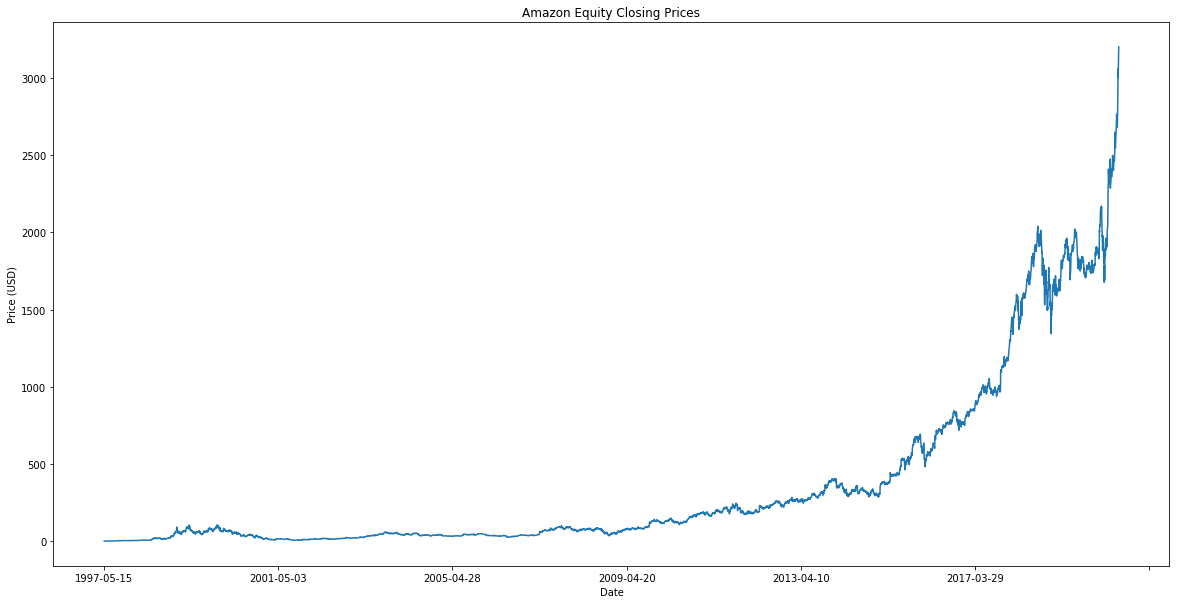

In [20]:
plt.figure(figsize = (20, 10))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Amazon Equity Closing Prices')
AMZN['Close'].plot()

In [4]:
def technical_indicators(stock):
    stock['MA7'] = stock['Close'].rolling(window = 7).mean()
    stock['MA21'] = stock['Close'].rolling(window = 21).mean()
    stock['12EWMA'] = stock['Close'].ewm(span = 12).mean()
    stock['26EWMA'] = stock['Close'].ewm(span = 26).mean()
    stock['MACD'] = stock['12EWMA'] - stock['26EWMA']
    stock['20STD'] = stock['Close'].rolling(window = 20).std()
    stock['Upper BB'] = stock['MA21'] + (2 * stock['20STD'])
    stock['Lower BB'] = stock['MA21'] - (2 * stock['20STD'])
    stock['EWMA'] = stock['Close'].ewm(com = 0.5).mean()
    stock['Momentum'] = stock['Close'] - 1
    stock['Logarithmic Momentum'] = np.log(stock['Momentum'])
    return stock

In [5]:
AMZN = technical_indicators(AMZN)
AMZN.tail()

,Close,MA7,MA21,12EWMA,26EWMA,MACD,20STD,Upper BB,Lower BB,EWMA,Momentum,Logarithmic Momentum
Date,,,,,,,,,,,,
2020-07-06,3057.040039,2816.098598,2687.694766,2789.513493,2674.027595,115.485898,130.845774,2949.386314,2426.003218,2994.890750,3056.040039,8.024875
2020-07-07,3000.120117,2851.175746,2712.319534,2821.914512,2698.182597,123.731916,140.496982,2993.313498,2431.325569,2998.376995,2999.120117,8.006074
2020-07-08,3081.110107,2906.638602,2738.845726,2861.790758,2726.547598,135.243160,158.622152,3056.090031,2421.601422,3053.532403,3080.110107,8.032721
2020-07-09,3182.629883,2978.388602,2766.549049,2911.150623,2760.331471,150.819153,184.240169,3135.029386,2398.068711,3139.597390,3181.629883,8.065149
2020-07-10,3200.000000,3041.414307,2792.860956,2955.588989,2792.899510,162.689479,200.139066,3193.139087,2392.582825,3179.865797,3199.000000,8.070594


In [10]:
def plot_technical_indicators(dataset, days):
    plt.figure(figsize = (18, 9))
    shape = dataset.shape[0]
    xMACD = shape - days
    dataset = dataset.iloc[-days:, :]
    x = range(3, shape)
    x = list(dataset.index)
    plt.subplot(2, 1, 1)
    plt.plot(dataset['MA7'], label = 'MA7', color = 'g', linestyle = '--')
    plt.plot(dataset['Close'], label = 'Closing Price', color = 'b')
    plt.plot(dataset['MA21'], label = 'MA21', color = 'r', linestyle = '--')
    plt.plot(dataset['Upper BB'], label = 'Upper BB', color = 'c')
    plt.plot(dataset['Lower BB'], label = 'Lower BB', color = 'c')
    plt.fill_between(x, dataset['Lower BB'], dataset['Upper BB'], alpha = 0.4)
    plt.title('Technical Indicators for Amazon: Previous {} Days'.format(shape))
    plt.ylabel('Price')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'], label = 'MACD', linestyle = '-.')
    plt.hlines(15, xMACD, shape, colors = 'g', linestyles = '--')
    plt.hlines(-15, xMACD, shape, colors = 'g', linestyles = '--')
    plt.plot(dataset['Logarithmic Momentum'], label = 'Momentum', color = 'b', linestyle = '-')
    plt.legend()

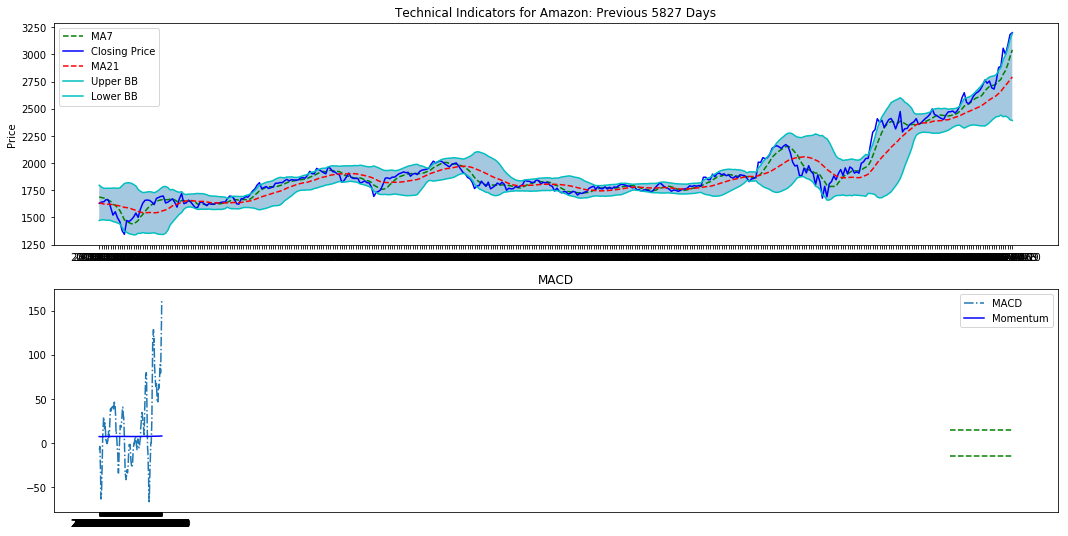

In [11]:
plot_technical_indicators(AMZN, 400)

In [15]:
FTData = AMZN[['Date', 'Close']]
closeFFT = np.fft.fft(np.asarray(FTData['Close'].tolist()))
FFT = pd.DataFrame({'FFT': closeFFT})
FFT['Absolute'] = FFT['FFT'].apply(lambda x: np.abs(x))
FFT['Angle'] = FFT['FFT'].apply(lambda x: np.angle(x))

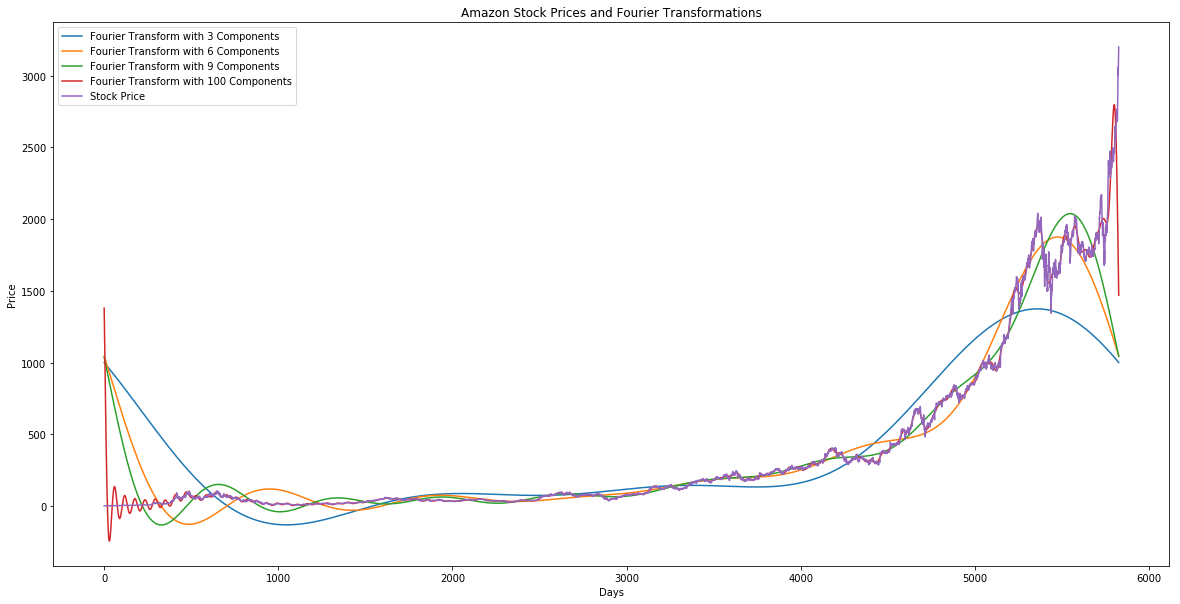

In [16]:
plt.figure(figsize = (20, 10))
FFTList = np.asarray(FFT['FFT'].tolist())
for num in [3, 6, 9, 100]:
    FFTListM10 = np.copy(FFTList); FFTListM10[num: -num] = 0
    plt.plot(np.fft.ifft(FFTListM10), label = 'Fourier Transform with {} Components'.format(num))
plt.plot(FTData['Close'], label = 'Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Amazon Stock Prices and Fourier Transformations')
plt.legend()

In [ ]:
import tensorflow as tf
from tensorflow import keras
